In [5]:
import os
import pandas as pd
import numpy as np
import datetime

import run_robot
import prepare_data
from importlib import reload
reload(prepare_data)
reload(run_robot)

<module 'run_robot' from '/home/pjssilva/documentos/pesquisa/robot_dance/code/run_robot.py'>

In [6]:
%%capture

# Compute initial values for first run and read the cities and other initial data
basic_prm = prepare_data.save_basic_parameters()
cities_data = prepare_data.compute_initial_condition_evolve_and_save(basic_prm, "SP", ["Araçatuba", "São José Do Rio Preto"], 500000, 1)
M = prepare_data.convert_mobility_matrix_and_save(cities_data, max_neighbors=3)

# Create a target matrix (max infected level)
ncities, ndays = len(cities_data.index), int(basic_prm["ndays"])
target = 0.007*np.ones((ncities, ndays))
target[-1, :] = 0.015
target = prepare_data.save_target(cities_data, target)

# Use a forcedif that releases the cities in the end
force_dif = np.ones((ncities, ndays))
# force_dif[:-1, 288:] = 0.0
# force_dif[-1, 149:] = 0.0

In [3]:
run_robot.prepare_optimization(basic_prm, cities_data, M, target, force_dif)

CPU times: user 21min 58s, sys: 1min 6s, total: 23min 4s
Wall time: 4min 21s


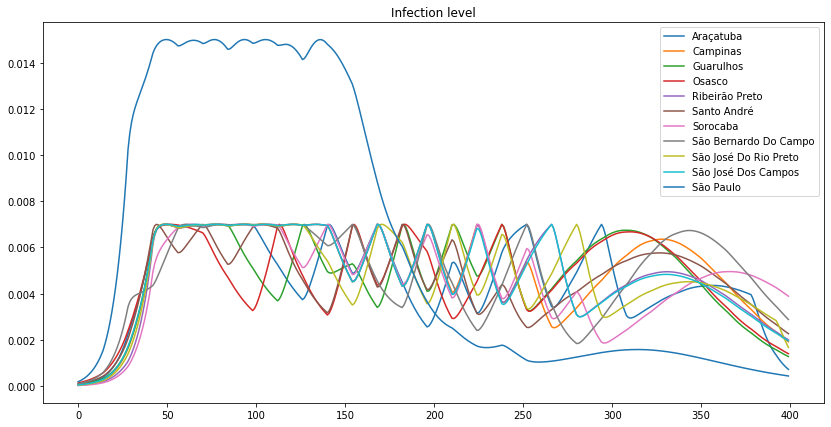

In [7]:
%%time
run_robot.optimize_and_show_results("results/window_14_i_new.png", "results/window_14_rt_new.png",
                                    "results/window_14_new.csv", cities_data.index)

In [ ]:
# Data to simulate the situtation with a correction of 12x
cities_data = prepare_data.compute_initial_condition_evolve_and_save(basic_prm, "SP", ["Araçatuba", "São José Do Rio Preto"], 500000, 12)
basic_prm["hammer_duration"] = 14

# Simulate São Paulo giving UTI places to the interior.
start_date = datetime.date(2020, 4, 23)
change_date = datetime.date(2020, 8, 20)
change_index = (change_date - start_date).days
target.iloc[:-1, change_index:] *= 2.0
target.iloc[-1, change_index:] /= 2.0
run_robot.prepare_optimization(basic_prm, cities_data, M, target, force_dif)

In [ ]:
%%time
run_robot.optimize_and_show_results("results/window_14_extra_capacity_i_new.png", "results/window_14_extra_capacity_rt_new.png",
                                    "results/window_14_extra_capacity_new.csv", cities_data.index)

In [ ]:
options = get_options()
basic_prm2, cities_data2, mob_matrix2, target2 = read_data(options)
ncities, ndays = len(cities_data2.index), int(basic_prm2["ndays"])
force_dif = np.ones((ncities, ndays))
prepare_optimization(basic_prm2, cities_data2, mob_matrix2, target2, force_dif)
optimize_and_show_results("results/cmd_i_new.png", "results/cmd_rt_new.png",
                          "results/cmd_new.csv", cities_data.index)
